# DATA ANAYSIS PROJECT
Dataset link: https://www.kaggle.com/danielgrijalvas/movies?select=movies.csv

The dataset used is a movie dataset obtained on Kaggle
I will try to analyse the dataset using matplotlib and seaborn

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Importing the data

In [2]:
df = pd.read_csv('C:\\Users\Gursimran Singh\Dev\DataAnalysis_Portfolio\Project3\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
name        7668 non-null object
rating      7591 non-null object
genre       7668 non-null object
year        7668 non-null int64
released    7666 non-null object
score       7665 non-null float64
votes       7665 non-null float64
director    7668 non-null object
writer      7665 non-null object
star        7667 non-null object
country     7665 non-null object
budget      5497 non-null float64
gross       7479 non-null float64
company     7651 non-null object
runtime     7664 non-null float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
#search for missing data
for column in df.columns:
    percent_missing = np.mean(df[column].isnull())
    print('{} - {:.2f}%'.format(column, percent_missing))

name - 0.00%
rating - 0.01%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.28%
gross - 0.02%
company - 0.00%
runtime - 0.00%


# Taking care of the missing data

In [5]:
usr_inp = input("""Enter 1 if the missing row should be deleted; 
                    Enter 2 if the missing data should be computed as 
                    mean of the data in the coulmn :""")
for col in df.columns:
    if usr_inp == '1':
        df = df.dropna()
    else:
        if col == 'score' or 'vote' or 'budget' or 'gross' or 'runtime':
            df = df.fillna(df.mean())  
        
for column in df.columns:
    if np.mean(df[column].isnull()):
        df = df.dropna()

Enter 1 if the missing row should be deleted; 
                    Enter 2 if the missing data should be computed as 
                    mean of the data in the coulmn :2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7576 entries, 0 to 7661
Data columns (total 15 columns):
name        7576 non-null object
rating      7576 non-null object
genre       7576 non-null object
year        7576 non-null int64
released    7576 non-null object
score       7576 non-null float64
votes       7576 non-null float64
director    7576 non-null object
writer      7576 non-null object
star        7576 non-null object
country     7576 non-null object
budget      7576 non-null float64
gross       7576 non-null float64
company     7576 non-null object
runtime     7576 non-null float64
dtypes: float64(5), int64(1), object(9)
memory usage: 947.0+ KB


In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Changnig the datatype of some columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [9]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.400000,1.230000e+05,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.900000,1.880000e+05,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.200000,3.300000e+05,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.800000,1.010000e+05,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.000000,1.000000e+04,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0


In [10]:
#Correcting the correct year and country column
df['released'] = df['released'].astype('str')
country = []
released = []
year = []
for i in df['released']:
    val = i.split("(")
    released.append(val[0])
    #year_val = val[0].split(',')
    #print((year_val))
    year.append(val[0][-5:])
    country.append(val[1].split(')')[0])

In [11]:
df['released_date'] = released
df['country'] = country
df['year'] = year
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"


In [12]:
df['year'] = df['year'].astype('int64')

In [13]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018"
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,"July 19, 2019"
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,"June 12, 2015"
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,"May 4, 2012"
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,"April 3, 2015"
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,"November 22, 2019"


In [14]:
pd.set_option('display.max_rows', 10)

# Drop duplicates

In [15]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.400000,2.400000e+03,Scott Teems,Scott Teems,Shea Whigham,Mexico,35589876,3661,Prowess Pictures,98.0,"April 17, 2020"
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.000000,2.940000e+02,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120.0,"June 3, 2020"
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.600000,3.500000e+01,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78.0,"February 7, 2020"
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.400000,4.470000e+02,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35589876,13266,Roxwell Films,87.0,"March 3, 2020"


# Correlation Analysis

Text(0, 0.5, 'Budget')

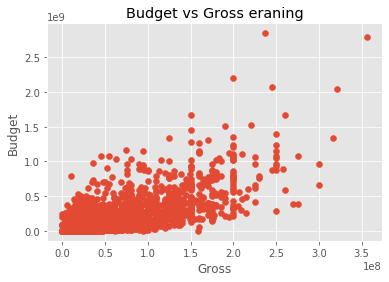

In [16]:
# Hypothesis : Bigger company and more budget may have high correlation
"""
Scatter plot with budget vs gross
"""
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross eraning')
plt.xlabel('Gross')
plt.ylabel('Budget')

In [17]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87.0,"October 30, 1998"
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110.0,"August 30, 1996"
3818,"Love, Honor and Obey",R,Comedy,2001,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United States,35589876,1400,British Broadcasting Corporation (BBC),103.0,"February 9, 2001"
7580,Run with the Hunted,Not Rated,Crime,2020,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,"June 26, 2020"


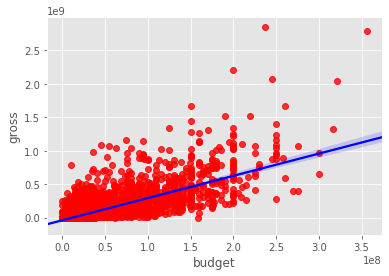

In [18]:
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

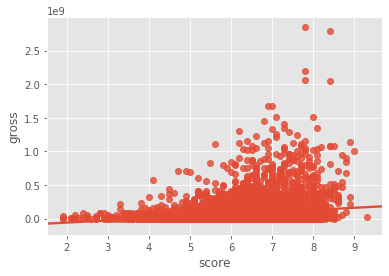

In [33]:
sns.regplot(x="score", y="gross", data=df)

In [19]:
# Correlation Analysis
#Pearson method
df.corr(method = 'pearson')
#df.corr(method = 'kendall')
#df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.109625,0.222215,0.262773,0.247520,0.120502
score,0.109625,1.000000,0.411938,0.064654,0.185084,0.400526
votes,0.222215,0.411938,1.000000,0.421218,0.629325,0.309353
budget,0.262773,0.064654,0.421218,1.000000,0.712561,0.265934
gross,0.247520,0.185084,0.629325,0.712561,1.000000,0.241618
runtime,0.120502,0.400526,0.309353,0.265934,0.241618,1.000000


Text(33.0, 0.5, 'features')

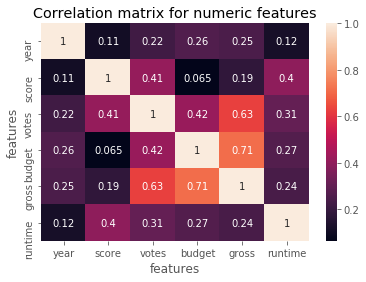

In [20]:
#correlation matrix
correlation_matrix = df.corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('features')
plt.ylabel('features')

# Categorical data

In [21]:
df_numeric = df.copy()

for col in df_numeric.columns:
    if df_numeric[col].dtype == 'object':
        df_numeric[col] = df_numeric[col].astype('category')
        df_numeric[col] = df_numeric[col].cat.codes

In [22]:
df_numeric

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,6508,6,6,1980,1685,8.400000,9.270000e+05,2545,3960,1022,55,19000000,46998772,2274,146.0,1495
1,5500,6,1,1980,1472,5.800000,6.500000e+04,2234,1613,316,55,4500000,58853106,710,104.0,1296
2,5075,4,0,1980,1751,8.700000,1.200000e+06,1093,2535,1708,55,18000000,538375067,1506,124.0,1553
3,282,4,4,1980,1472,7.700000,2.210000e+05,1279,1976,2198,55,3500000,83453539,1770,88.0,1296
4,1016,6,4,1980,1523,7.300000,1.080000e+05,1037,511,398,55,6000000,39846344,1737,98.0,1345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,6401,6,5,2020,91,5.400000,2.400000e+03,2476,3828,2386,33,35589876,3661,1861,98.0,76
7656,6938,5,4,2020,1865,5.000000,2.940000e+02,2471,3821,2327,55,35589876,413378,1863,120.0,1652
7658,789,6,6,2020,1091,6.600000,3.500000e+01,1740,1052,515,55,5000,78500541,1710,78.0,964
7659,2626,3,9,2020,2120,3.400000,4.470000e+02,1586,2435,1500,55,35589876,13266,1949,87.0,1876


In [23]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.400000,2.400000e+03,Scott Teems,Scott Teems,Shea Whigham,Mexico,35589876,3661,Prowess Pictures,98.0,"April 17, 2020"
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.000000,2.940000e+02,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120.0,"June 3, 2020"
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.600000,3.500000e+01,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78.0,"February 7, 2020"
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.400000,4.470000e+02,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35589876,13266,Roxwell Films,87.0,"March 3, 2020"


In [24]:
# Correlation Analysis
#Pearson method
df_numeric.corr(method = 'pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
name,1.000000,-0.011944,0.015250,0.012680,-0.009936,0.016160,0.013174,0.009605,0.010271,0.005666,0.001182,0.020954,0.005071,0.010085,0.011130,-0.009877
rating,-0.011944,1.000000,0.117657,0.025343,0.024450,0.011562,0.016092,0.017211,-0.004538,0.005972,-0.020948,-0.156385,-0.129384,-0.076860,0.069152,0.023580
genre,0.015250,0.117657,1.000000,-0.084491,0.030843,0.040281,-0.148341,-0.013502,0.006956,-0.003450,-0.092428,-0.316818,-0.238240,-0.068755,-0.044531,0.030059
year,0.012680,0.025343,-0.084491,1.000000,-0.006385,0.109625,0.222215,-0.022072,-0.012145,-0.027922,-0.091751,0.262773,0.247520,-0.014204,0.120502,-0.006458
released,-0.009936,0.024450,0.030843,-0.006385,1.000000,0.043226,0.016870,-0.001867,-0.003831,0.018129,-0.050864,0.013142,0.000520,-0.008693,0.000249,0.999912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
budget,0.020954,-0.156385,-0.316818,0.262773,0.013142,0.064654,0.421218,-0.010373,-0.033407,-0.017244,0.082728,1.000000,0.712561,0.144166,0.265934,0.014545
gross,0.005071,-0.129384,-0.238240,0.247520,0.000520,0.185084,0.629325,-0.014106,-0.023732,-0.002506,0.114095,0.712561,1.000000,0.152463,0.241618,0.001963
company,0.010085,-0.076860,-0.068755,-0.014204,-0.008693,0.000325,0.129579,0.001328,0.003174,0.009243,0.089014,0.144166,0.152463,1.000000,0.030856,-0.008167
runtime,0.011130,0.069152,-0.044531,0.120502,0.000249,0.400526,0.309353,0.017403,-0.004657,0.008550,-0.014056,0.265934,0.241618,0.030856,1.000000,0.000306


Text(32.09375, 0.5, 'features')

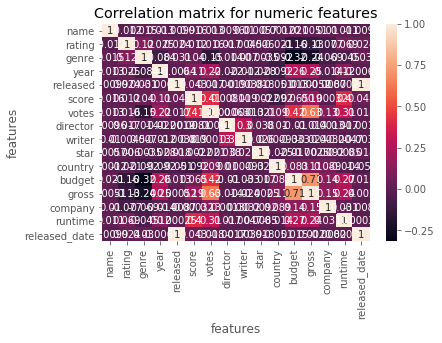

In [25]:
#correlation matrix
correlation_matrix = df_numeric.corr(method= 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix for numeric features')
plt.xlabel('features')
plt.ylabel('features')

In [26]:
corr_mat = df_numeric.corr(method = 'pearson')
corr_pairs = corr_mat.unstack()
corr_pairs

name           name             1.000000
               rating          -0.011944
               genre            0.015250
               year             0.012680
               released        -0.009936
                                  ...   
released_date  budget           0.014545
               gross            0.001963
               company         -0.008167
               runtime          0.000306
               released_date    1.000000
Length: 256, dtype: float64

In [32]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre          budget          -0.316818
budget         genre           -0.316818
genre          gross           -0.238240
gross          genre           -0.238240
rating         budget          -0.156385
                                  ...   
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_date  released_date    1.000000
Length: 256, dtype: float64


In [27]:
sorted_pair = corr_pairs.sort_values()
print(sorted_pair[(sorted_pair)>0.6])

votes          gross            0.629325
gross          votes            0.629325
               budget           0.712561
budget         gross            0.712561
released       released_date    0.999912
                                  ...   
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_date  released_date    1.000000
Length: 22, dtype: float64


In [28]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56407679663
Universal Pictures           52592689431
Columbia Pictures            43008941346
Paramount Pictures           40572107956
Twentieth Century Fox        40257053857
                                ...     
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9387231187
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, Length: 15, dtype: int64

In [29]:
df.groupby(['company', 'year'])[["gross"]].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2020,193457467
.406 Production,1997,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


In [ ]:
sns.swarmplot(x="rating", y="gross", data=df)

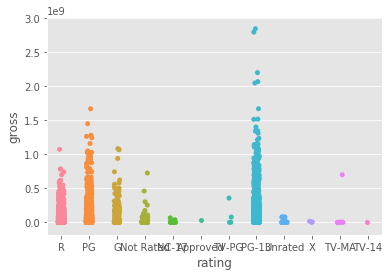

In [34]:
sns.stripplot(x="rating", y="gross", data=df)